# Load dataset from a folder

In [381]:
from collections import defaultdict
from pathlib import Path
import pandas as pd

my_dir_path = "/Users/yishan/Documents/OneDrive/fall 21/inf2209/corpus/txt3"

results = defaultdict(list)
for file in Path(my_dir_path).iterdir():
    with open(file, "rb") as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
df = pd.DataFrame(results).set_index('file_name')

In [382]:
import glob
import os
import re
path = "/Users/yishan/Documents/OneDrive/fall 21/inf2209/corpus/txt3"
os.chdir(path)

corpus_raw=[]
  
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        corpus_raw.append(f.read())
        
# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
  
        # call read text file function
        read_text_file(file_path)

print(corpus_raw[1][0:100])

The Inscription of Remnant Things:
Zhang Dai’s “Twenty-Eight Friends”*
Thomas Kelly (bio)
This essay


Prepare the Dataframe with file names as index

In [383]:
import pandas as pd
df2 = pd.DataFrame(data = corpus_raw, columns = ['text2'])

In [385]:
df2 = df2.set_index(df.index)

In [386]:
df2

text2
file_name                                                         
39-2-17-58.txt   \nThe Distant Sound of Book Boats:\nThe Itiner...
42-1-1-43.txt    The Inscription of Remnant Things:\nZhang Dai’...
27-1-1-30.txt    State, Community, and Pirate Suppression in Gu...
06-1-1-55.txt    \nTHE SPATIAL STRUCTURE OF MING LOCAL ADMINIST...
06-2-1-12.txt    \n\nChina and World History\n\nR. Bin Wong*\nD...
...                                                            ...
27-2-99-124.txt  Objects, Spectacle, and a Nation on Display at...
31-2-69-96.txt   Money, Economy, and Polity in the Daoguang-Era...
36-1-53-87.txt   Reframing the Boundaries of Household and Text...
11-2-32-62.txt   \n
WHERE WERE THE WOMEN?\nRETHINKING MARRIAGE ...
31-1-62-97.txt   “A Pearl in the Palm”:\nA Forgotten Symbol of ...

[292 rows x 1 columns]

Clean the texts

In [387]:
import re
import string

def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*\]', ' ', text)
    text = re.sub('[“|”]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) #get rid of punctuations
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('\n', '', text)
    
    return text

<>:6: DeprecationWarning: invalid escape sequence \[
<>:9: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \[
<>:9: DeprecationWarning: invalid escape sequence \w
/var/folders/sc/38gdsyzs07sg_61kjkwh6zn40000gn/T/ipykernel_16491/3492477244.py:6: DeprecationWarning: invalid escape sequence \[
  text = re.sub('\[.*\]', ' ', text)
/var/folders/sc/38gdsyzs07sg_61kjkwh6zn40000gn/T/ipykernel_16491/3492477244.py:9: DeprecationWarning: invalid escape sequence \w
  text = re.sub('\w*\d\w*', ' ', text)


In [388]:
df2['text2'] = df2['text2'].apply(clean_text_round1)


In [389]:
df2

text2
file_name                                                         
39-2-17-58.txt   the distant sound of book boats the itinerant ...
42-1-1-43.txt    the inscription of remnant things zhang dai’s ...
27-1-1-30.txt    state  community  and pirate suppression in gu...
06-1-1-55.txt    the spatial structure of ming local administra...
06-2-1-12.txt    china and world historyr  bin wong division of...
...                                                            ...
27-2-99-124.txt  objects  spectacle  and a nation on display at...
31-2-69-96.txt   money  economy  and polity in the daoguang era...
36-1-53-87.txt   reframing the boundaries of household and text...
11-2-32-62.txt   
where were the women rethinking marriage resi...
31-1-62-97.txt    a pearl in the palm  a forgotten symbol of th...

[292 rows x 1 columns]

In [390]:
df2 = df2.reset_index()

In [391]:
df2['file_name'] = df2['file_name'].str[0:-4]

there might be a hidden file generated by the Mac OS, if so, delete the entry

In [ ]:
df2.sort_values(by = ['file_name'])

In [395]:
df2 = df2.drop('.DS_S')

create a dataframe that contains only the issue number of the articles

In [450]:
df3 = df2.reset_index()

In [190]:
df2 = df2.sort_values(by = ['file_name'])

In [451]:
df3['issue'] = df3.file_name.str[0:4]

In [452]:
df3

file_name                                              text2 issue
0       06-1-1-55  the spatial structure of ming local administra...  06-1
1      06-1-56-82  kuo lu  a sworn brotherhood organizationin sze...  06-1
2     06-1-83-112  tax revolt in late qing china  the small sword...  06-1
3       06-2-1-12  china and world historyr  bin wong division of...  06-2
4      06-2-25-36  seeing through pictures and poetry a history o...  06-2
..            ...                                                ...   ...
286  42-1-131-175  heroes within bowshot examination administrati...  42-1
287  42-1-177-220  from dynastic state to imperial nation interna...  42-1
288    42-1-45-91  artisanal luxury and confucian statecraft the ...  42-1
289   42-1-93-129  reimagining qing space yongzheng’s eurasian at...  42-1
290   42-1-95-130  promotion  patronage  and poetic socialization...  42-1

[291 rows x 3 columns]

In [400]:
df2 = df2.sort_values(by = ['file_name'])

In [401]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

#defining functions
def get_lemma(word_tags):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma = []
    for element in word_tags:
        word = element[0][0]
        pos = element[0][1]
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                   "N": wordnet.NOUN,
                   "V": wordnet.VERB,
                   "R": wordnet.ADV}
        wordnet_pos = tag_dict.get(tag, wordnet.NOUN)
        lemma.append(wordnet_lemmatizer.lemmatize(word, wordnet_pos))
    return(lemma)


text2
file_name                                                      
06-1-1-55     the spatial structure of ming local administra...
06-1-56-82    kuo lu  a sworn brotherhood organizationin sze...
06-1-83-112   tax revolt in late qing china  the small sword...
06-2-1-12     china and world historyr  bin wong division of...
06-2-25-36    seeing through pictures and poetry a history o...
...                                                         ...
42-1-131-175  heroes within bowshot examination administrati...
42-1-177-220  from dynastic state to imperial nation interna...
42-1-45-91    artisanal luxury and confucian statecraft the ...
42-1-93-129   reimagining qing space yongzheng’s eurasian at...
42-1-95-130   promotion  patronage  and poetic socialization...

[291 rows x 1 columns]

In [402]:
df2.to_csv("processed.csv")

In [11]:
df2

text2
file_name                                                         
39-2-17-58.txt   the distant sound of book boats the itinerant ...
42-1-1-43.txt    the inscription of remnant things zhang dai’s ...
27-1-1-30.txt    state  community  and pirate suppression in gu...
42-1-45-91.txt   artisanal luxury and confucian statecraft the ...
25-2-74-118.txt  where is the center of cultural production the...
...                                                            ...
27-2-99-124.txt  objects  spectacle  and a nation on display at...
31-2-69-96.txt   money  economy  and polity in the daoguang era...
36-1-53-87.txt   reframing the boundaries of household and text...
11-2-32-62.txt   
where were the women rethinking marriage resi...
31-1-62-97.txt    a pearl in the palm  a forgotten symbol of th...

[269 rows x 1 columns]

In [403]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['wang','however','huang','university','stanford',
                   'zhang','wang','many','new','even','however,',
                   'well','li','zhi','first','three','liu','wu',
                   'also','china','chinese','late','ch','two','one','see',
                   'century','would','qing','could','imperial','ji','dai'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yishan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [404]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text

tv = TfidfVectorizer(stop_words = stop_words, ngram_range = (1,1), max_df = 0.8, min_df = 0.1)
data_tv = tv.fit_transform(df2['text2'])


In [405]:
data_dtm = pd.DataFrame(data_tv.toarray(), columns=tv.get_feature_names())
data_dtm.index = df2.index
data_dtm

abandon  abandoned  abilities   ability      able    abroad  \
file_name                                                                    
06-1-1-55     0.000000   0.004735   0.000000  0.003470  0.020084  0.000000   
06-1-56-82    0.000000   0.000000   0.000000  0.000000  0.004310  0.000000   
06-1-83-112   0.008866   0.000000   0.000000  0.000000  0.023150  0.000000   
06-2-1-12     0.000000   0.000000   0.000000  0.000000  0.021448  0.000000   
06-2-25-36    0.000000   0.000000   0.006067  0.039286  0.009475  0.000000   
...                ...        ...        ...       ...       ...       ...   
42-1-131-175  0.000000   0.000000   0.000000  0.003399  0.000000  0.000000   
42-1-177-220  0.000000   0.004647   0.000000  0.000000  0.002464  0.012282   
42-1-45-91    0.000000   0.000000   0.000000  0.000000  0.003025  0.000000   
42-1-93-129   0.000000   0.000000   0.000000  0.000000  0.000000  0.000000   
42-1-95-130   0.000000   0.000000   0.000000  0.000000  0.000000  0.000000   

               absence    absent  absolute  absolutely  ...     zhili  \
file_name                                               ...             
06-1-1-55     0.004090  0.005108  0.004986    0.000000  ...  0.032041   
06-1-56-82    0.007021  0.000000  0.000000    0.000000  ...  0.000000   
06-1-83-112   0.000000  0.000000  0.000000    0.009219  ...  0.000000   
06-2-1-12     0.000000  0.000000  0.000000    0.000000  ...  0.000000   
06-2-25-36    0.003859  0.004819  0.000000    0.000000  ...  0.000000   
...                ...       ...       ...         ...  ...       ...   
42-1-131-175  0.000000  0.000000  0.004883    0.000000  ...  0.005231   
42-1-177-220  0.000000  0.000000  0.004893    0.000000  ...  0.000000   
42-1-45-91    0.004929  0.006155  0.000000    0.000000  ...  0.000000   
42-1-93-129   0.004873  0.006085  0.000000    0.007147  ...  0.000000   
42-1-95-130   0.000000  0.000000  0.000000    0.000000  ...  0.000000   

                 zhong  zhongguo      zhou       zhu  zhuan  zhuang        zi  \
file_name                                                                       
06-1-1-55     0.000000  0.000000  0.007449  0.026524    0.0     0.0  0.000000   
06-1-56-82    0.000000  0.000000  0.000000  0.000000    0.0     0.0  0.000000   
06-1-83-112   0.000000  0.000000  0.057237  0.000000    0.0     0.0  0.000000   
06-2-1-12     0.000000  0.000000  0.000000  0.000000    0.0     0.0  0.000000   
06-2-25-36    0.000000  0.000000  0.014056  0.028601    0.0     0.0  0.005443   
...                ...       ...       ...       ...    ...     ...       ...   
42-1-131-175  0.000000  0.000000  0.000000  0.003711    0.0     0.0  0.000000   
42-1-177-220  0.009346  0.149396  0.014620  0.014875    0.0     0.0  0.000000   
42-1-45-91    0.000000  0.000000  0.000000  0.004566    0.0     0.0  0.000000   
42-1-93-129   0.000000  0.000000  0.000000  0.000000    0.0     0.0  0.000000   
42-1-95-130   0.000000  0.000000  0.000000  0.086358    0.0     0.0  0.000000   

                  zone       zuo  
file_name                         
06-1-1-55     0.006554  0.000000  
06-1-56-82    0.000000  0.000000  
06-1-83-112   0.000000  0.000000  
06-2-1-12     0.000000  0.000000  
06-2-25-36    0.000000  0.000000  
...                ...       ...  
42-1-131-175  0.000000  0.005568  
42-1-177-220  0.000000  0.000000  
42-1-45-91    0.000000  0.000000  
42-1-93-129   0.000000  0.000000  
42-1-95-130   0.000000  0.007620  

[291 rows x 4510 columns]

In [406]:
terms = tv.get_feature_names()

In [407]:
file_names = data_dtm.index

save a backup file 

In [408]:
import joblib

In [409]:
joblib.dump((data_dtm,terms,file_names), "articles-tfidf-2.pkl") 


['articles-tfidf-2.pkl']

In [410]:
data_dtm.shape

(291, 4510)

# fit the model
code adpated from GitHub https://github.com/fred-ss/topic-model-tutorial

In [411]:
def display_topics(model, feature_names, num_top_words, topic_names=None): 
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic", ix)
        else:
            print("\nTopic: ", topic_names[ix],"'")
        print(", ".join([feature_names[i] \
              for i in topic.argsort()[:-num_top_words -1:-1]]))

In [478]:
nmf_model = NMF(23)
doc_topic = nmf_model.fit_transform(data_dtm)
display_topics(nmf_model, tv.get_feature_names(), 30)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic 0
county, community, town, police, government, magistrate, gentry, pu, leaders, temple, society, magistrates, public, units, charitable, tax, xiang, organization, militia, provincial, bureau, administrative, fees, managers, institutions, households, elites, lu, reform, elite

Topic 1
women, woman, female, poetry, male, mei, girls, poems, writers, talent, literary, gender, letters, education, writing, husband, yuan, feet, poem, daughters, sexual, talented, writings, shen, wrote, poets, beauty, poet, love, wife

Topic 2
manchu, banner, language, bannermen, translation, garrison, han, manchus, court, ethnic, banners, kangxi, kong, memorials, palace, schools, mongolian, tribute, languages, beijing, emperor, identity, linguistic, memorial, communications, ethnicity, shunzhi, students, king, ritual

Topic 3
legal, law, judicial, code, cases, magistrate, crime, punishment, victim, justice, punishments, criminal, crimes, court, county, advisors, prison, pan, magistrates, sentenced, kill

In [480]:
doc_topic.shape

(291, 23)

In [481]:
H = nmf_model.components_

In [482]:
H.shape

(23, 4510)

In [436]:
W = data_dtm

In [213]:
def plot_top_term_weights( terms, H, topic_index, top ):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

In [214]:
terms = tv.get_feature_names()

# prepare visualization

In [524]:
import joblib
import numpy as np
from sklearn import decomposition
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [479]:
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(nmf_model, data_tv, tv)


/Applications/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
20    -0.144069 -0.008735       1        1  7.375039
17    -0.086779 -0.024788       2        1  5.753166
8      0.062908  0.020525       3        1  5.752417
1     -0.188132  0.004571       4        1  5.377045
13    -0.115256  0.022795       5        1  5.347911
6      0.024036  0.051944       6        1  5.227733
21     0.173331  0.028756       7        1  5.216904
19     0.051677  0.034293       8        1  4.980674
12    -0.111710  0.059239       9        1  4.836154
3      0.015729  0.025269      10        1  4.794674
15     0.102952  0.043313      11        1  4.209116
14     0.037736  0.150115      12        1  4.189002
10    -0.040206 -0.115303      13        1  4.024671
9     -0.187326  0.020838      14        1  3.954206
11     0.114134 -0.279059      15        1  3.951570
0      0.092365  0.042820      16        1  3.654942
5      0.050009  0.059495      17        1  3.386449
2      0.050285  0.028116      18        1  3.259325
16     0.144285  0.048969      19        1  3.235041
7     -0.094821 -0.046167      20        1  3.037787
18     0.112111  0.079674      21        1  2.936992
4      0.070552 -0.213994      22        1  2.837339
22    -0.133810 -0.032685      23        1  2.661843, topic_info=            Term       Freq      Total Category  logprob  loglift
4433       women  18.000000  18.000000  Default  30.0000  30.0000
2445      manchu   8.000000   8.000000  Default  29.0000  29.0000
2498     medical   6.000000   6.000000  Default  28.0000  28.0000
575         chao   6.000000   6.000000  Default  27.0000  27.0000
2579      mongol   5.000000   5.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
3352   religious   0.418671   4.570509  Topic23  -5.6826   1.2359
664   collection   0.398738   4.013604  Topic23  -5.7314   1.3170
3873       story   0.383608   3.514866  Topic23  -5.7701   1.4110
2375    literati   0.379567   4.684269  Topic23  -5.7807   1.1132
2834       paper   0.374901   2.899964  Topic23  -5.7930   1.5804

[1101 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
15        2  0.726149       academies
16        2  0.704421         academy
64        6  0.542856          actors
64       14  0.542856          actors
86        3  0.395968  administration
...     ...       ...             ...
4499      9  0.271178           zheng
4499     17  0.542356           zheng
4501     23  0.652854           zhong
4504      2  0.589216             zhu
4505     13  0.582885           zhuan

[848 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[21, 18, 9, 2, 14, 7, 22, 20, 13, 4, 16, 15, 11, 10, 12, 1, 6, 3, 17, 8, 19, 5, 23])

/Applications/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Applications/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Applications/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Applications/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Applications/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: Deprecatio

In [483]:
td_chart = pd.DataFrame(doc_topic, index = df2.index)

In [484]:
#td_chart.reset_index()
td_chart

0         1         2         3         4         5   \
file_name                                                                  
06-1-1-55     0.124289  0.000000  0.000000  0.000000  0.085463  0.000000   
06-1-56-82    0.057495  0.000000  0.000000  0.004861  0.009615  0.000000   
06-1-83-112   0.061889  0.000000  0.000000  0.000000  0.000000  0.000000   
06-2-1-12     0.000000  0.003882  0.000000  0.000000  0.023292  0.111209   
06-2-25-36    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...                ...       ...       ...       ...       ...       ...   
42-1-131-175  0.003594  0.000000  0.019560  0.000000  0.022854  0.000000   
42-1-177-220  0.000000  0.000000  0.058740  0.093499  0.000000  0.028826   
42-1-45-91    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
42-1-93-129   0.000000  0.000000  0.035391  0.000000  0.001672  0.000000   
42-1-95-130   0.003483  0.199454  0.000000  0.000000  0.003500  0.000000   

                    6         7         8         9   ...        13        14  \
file_name                                             ...                       
06-1-1-55     0.000000  0.000000  0.000000  0.009862  ...  0.000000  0.000000   
06-1-56-82    0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
06-1-83-112   0.194119  0.000000  0.000000  0.000000  ...  0.000000  0.212302   
06-2-1-12     0.006152  0.025330  0.000000  0.011239  ...  0.008550  0.000000   
06-2-25-36    0.000947  0.034373  0.000000  0.013817  ...  0.053735  0.000000   
...                ...       ...       ...       ...  ...       ...       ...   
42-1-131-175  0.000000  0.000000  0.201461  0.000000  ...  0.000000  0.027284   
42-1-177-220  0.157392  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
42-1-45-91    0.000000  0.000000  0.312977  0.000000  ...  0.047720  0.000000   
42-1-93-129   0.000000  0.000000  0.081895  0.000000  ...  0.000000  0.000000   
42-1-95-130   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   

                    15        16        17        18        19        20  \
file_name                                                                  
06-1-1-55     0.044715  0.000000  0.000000  0.013930  0.017854  0.000000   
06-1-56-82    0.013218  0.041872  0.002101  0.005729  0.010219  0.082121   
06-1-83-112   0.000000  0.036266  0.000000  0.004233  0.000000  0.000000   
06-2-1-12     0.021723  0.009602  0.060948  0.032419  0.116526  0.021057   
06-2-25-36    0.010901  0.005449  0.021379  0.000000  0.030816  0.371811   
...                ...       ...       ...       ...       ...       ...   
42-1-131-175  0.000000  0.000000  0.064663  0.000000  0.000000  0.000000   
42-1-177-220  0.000000  0.000000  0.085008  0.003714  0.068438  0.000000   
42-1-45-91    0.000000  0.000000  0.000000  0.000000  0.000000  0.239409   
42-1-93-129   0.000000  0.000000  0.000000  0.000000  0.466618  0.000000   
42-1-95-130   0.000000  0.000000  0.000000  0.000000  0.000000  0.380051   

                    21        22  
file_name                         
06-1-1-55     0.053010  0.000000  
06-1-56-82    0.041928  0.082223  
06-1-83-112   0.039395  0.000000  
06-2-1-12     0.030025  0.000000  
06-2-25-36    0.000000  0.002623  
...                ...       ...  
42-1-131-175  0.079059  0.000000  
42-1-177-220  0.000000  0.000000  
42-1-45-91    0.000000  0.000000  
42-1-93-129   0.000000  0.000000  
42-1-95-130   0.000000  0.000000  

[291 rows x 23 columns]

In [461]:
td_chart_issue = td_chart

In [454]:
df3 = df3.drop(columns = 'text2')

In [455]:
df3 = df3.set_index('file_name')

In [485]:
td_chart_issue2 = pd.concat([td_chart, df3],axis = 1)

In [486]:
td_chart_issue2

0         1         2         3         4         5  \
file_name                                                                  
06-1-1-55     0.124289  0.000000  0.000000  0.000000  0.085463  0.000000   
06-1-56-82    0.057495  0.000000  0.000000  0.004861  0.009615  0.000000   
06-1-83-112   0.061889  0.000000  0.000000  0.000000  0.000000  0.000000   
06-2-1-12     0.000000  0.003882  0.000000  0.000000  0.023292  0.111209   
06-2-25-36    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...                ...       ...       ...       ...       ...       ...   
42-1-131-175  0.003594  0.000000  0.019560  0.000000  0.022854  0.000000   
42-1-177-220  0.000000  0.000000  0.058740  0.093499  0.000000  0.028826   
42-1-45-91    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
42-1-93-129   0.000000  0.000000  0.035391  0.000000  0.001672  0.000000   
42-1-95-130   0.003483  0.199454  0.000000  0.000000  0.003500  0.000000   

                     6         7         8         9  ...        14        15  \
file_name                                             ...                       
06-1-1-55     0.000000  0.000000  0.000000  0.009862  ...  0.000000  0.044715   
06-1-56-82    0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.013218   
06-1-83-112   0.194119  0.000000  0.000000  0.000000  ...  0.212302  0.000000   
06-2-1-12     0.006152  0.025330  0.000000  0.011239  ...  0.000000  0.021723   
06-2-25-36    0.000947  0.034373  0.000000  0.013817  ...  0.000000  0.010901   
...                ...       ...       ...       ...  ...       ...       ...   
42-1-131-175  0.000000  0.000000  0.201461  0.000000  ...  0.027284  0.000000   
42-1-177-220  0.157392  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
42-1-45-91    0.000000  0.000000  0.312977  0.000000  ...  0.000000  0.000000   
42-1-93-129   0.000000  0.000000  0.081895  0.000000  ...  0.000000  0.000000   
42-1-95-130   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   

                    16        17        18        19        20        21  \
file_name                                                                  
06-1-1-55     0.000000  0.000000  0.013930  0.017854  0.000000  0.053010   
06-1-56-82    0.041872  0.002101  0.005729  0.010219  0.082121  0.041928   
06-1-83-112   0.036266  0.000000  0.004233  0.000000  0.000000  0.039395   
06-2-1-12     0.009602  0.060948  0.032419  0.116526  0.021057  0.030025   
06-2-25-36    0.005449  0.021379  0.000000  0.030816  0.371811  0.000000   
...                ...       ...       ...       ...       ...       ...   
42-1-131-175  0.000000  0.064663  0.000000  0.000000  0.000000  0.079059   
42-1-177-220  0.000000  0.085008  0.003714  0.068438  0.000000  0.000000   
42-1-45-91    0.000000  0.000000  0.000000  0.000000  0.239409  0.000000   
42-1-93-129   0.000000  0.000000  0.000000  0.466618  0.000000  0.000000   
42-1-95-130   0.000000  0.000000  0.000000  0.000000  0.380051  0.000000   

                    22  issue  
file_name                      
06-1-1-55     0.000000   06-1  
06-1-56-82    0.082223   06-1  
06-1-83-112   0.000000   06-1  
06-2-1-12     0.000000   06-2  
06-2-25-36    0.002623   06-2  
...                ...    ...  
42-1-131-175  0.000000   42-1  
42-1-177-220  0.000000   42-1  
42-1-45-91    0.000000   42-1  
42-1-93-129   0.000000   42-1  
42-1-95-130   0.000000   42-1  

[291 rows x 24 columns]

As there are too many files, to make the visualization easier to understand, create a new matrix by combine articles in the same issue

In [487]:
td_chart_issue2 = td_chart_issue2.groupby(['issue']).sum()

In [488]:
td_chart_issue2

0         1         2         3         4         5         6   \
issue                                                                         
06-1   0.243673  0.000000  0.000000  0.004861  0.095078  0.000000  0.194119   
06-2   0.029465  0.004452  0.016153  0.000000  0.023292  0.422088  0.041106   
07-1   0.061130  0.009941  0.056346  0.000000  0.041112  0.063988  0.011874   
07-2   0.068051  0.000000  0.041961  0.027032  0.209227  0.146316  0.000000   
08-1   0.067623  0.028472  0.000000  0.108736  0.342947  0.000828  0.002061   
...         ...       ...       ...       ...       ...       ...       ...   
40-1   0.000000  0.315573  0.000000  0.356941  0.000000  0.000000  0.000000   
40-2   0.003109  0.009592  0.462664  0.000000  0.027061  0.010134  0.042948   
41-1   0.069435  0.025328  0.011877  0.037547  0.345556  0.008575  0.116228   
41-2   0.037213  0.012675  0.483064  0.039421  0.003273  0.073667  0.053322   
42-1   0.007077  0.199454  0.113691  0.093499  0.028026  0.028826  0.157392   

             7         8         9   ...        13        14        15  \
issue                                ...                                 
06-1   0.000000  0.000000  0.009862  ...  0.000000  0.212302  0.057933   
06-2   0.059703  0.000000  0.025056  ...  0.062285  0.020981  0.032624   
07-1   0.002210  0.742613  0.023005  ...  0.000000  0.014222  0.034771   
07-2   0.000000  0.032238  0.000000  ...  0.101615  0.000000  0.064474   
08-1   0.600273  0.348911  0.054443  ...  0.144947  0.031182  0.014434   
...         ...       ...       ...  ...       ...       ...       ...   
40-1   0.000000  0.209999  0.011258  ...  0.051282  0.000000  0.000000   
40-2   0.032234  0.000000  0.000000  ...  0.344672  0.183914  0.007427   
41-1   0.029106  0.056711  0.059897  ...  0.591216  0.267324  0.000000   
41-2   0.497613  0.197419  0.000000  ...  0.027396  0.041793  0.267040   
42-1   0.000000  0.599540  0.014386  ...  0.057762  0.027284  0.005072   

             16        17        18        19        20        21        22  
issue                                                                        
06-1   0.078138  0.002101  0.023892  0.028072  0.082121  0.134333  0.082223  
06-2   0.052273  0.113875  0.060693  0.306323  0.392868  0.071763  0.002623  
07-1   0.224233  0.408921  0.009045  0.018554  0.028259  0.159656  0.630262  
07-2   0.000261  0.160826  0.015171  0.000000  0.000000  0.347937  0.016108  
08-1   0.004831  0.006995  0.002115  0.000000  0.004047  0.168538  0.359016  
...         ...       ...       ...       ...       ...       ...       ...  
40-1   0.000000  0.105643  0.411335  0.320731  0.238546  0.000000  0.000000  
40-2   0.000000  0.063952  0.005563  0.525641  0.118929  0.019952  0.079131  
41-1   0.000000  0.318587  0.000000  0.336555  0.136138  0.151079  0.014440  
41-2   0.014706  0.092608  0.160241  0.265742  0.000000  0.074477  0.010451  
42-1   0.000000  0.151122  0.003714  0.536106  0.967687  0.079059  0.013677  

[72 rows x 23 columns]

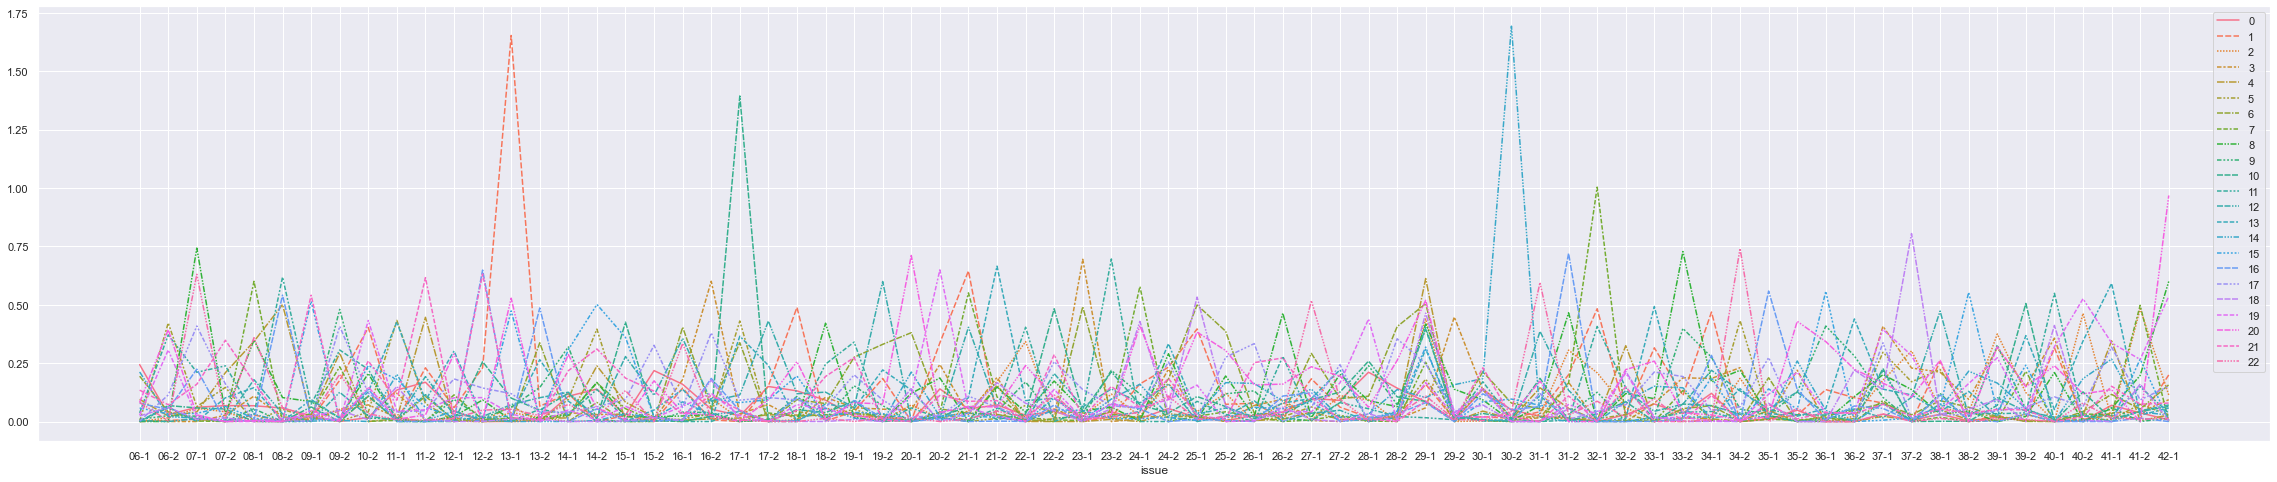

In [489]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cols = [4,17]
plt.figure(figsize = [40, 8])
plot = sns.lineplot(data=td_chart_issue2)


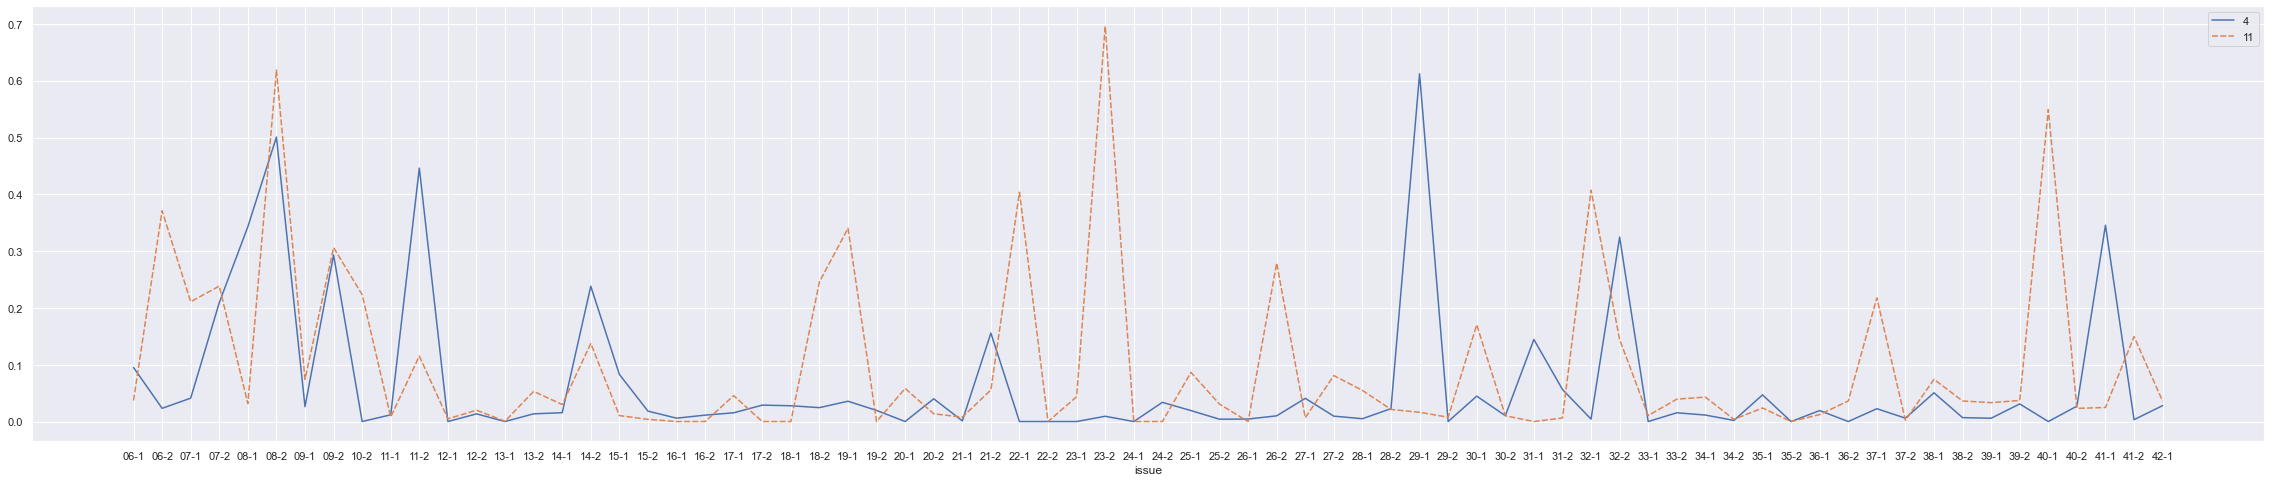

In [490]:
cols = [4,17]
plt.figure(figsize = [40, 8])
plot = sns.lineplot(data=td_chart_issue2[[4, 11]])

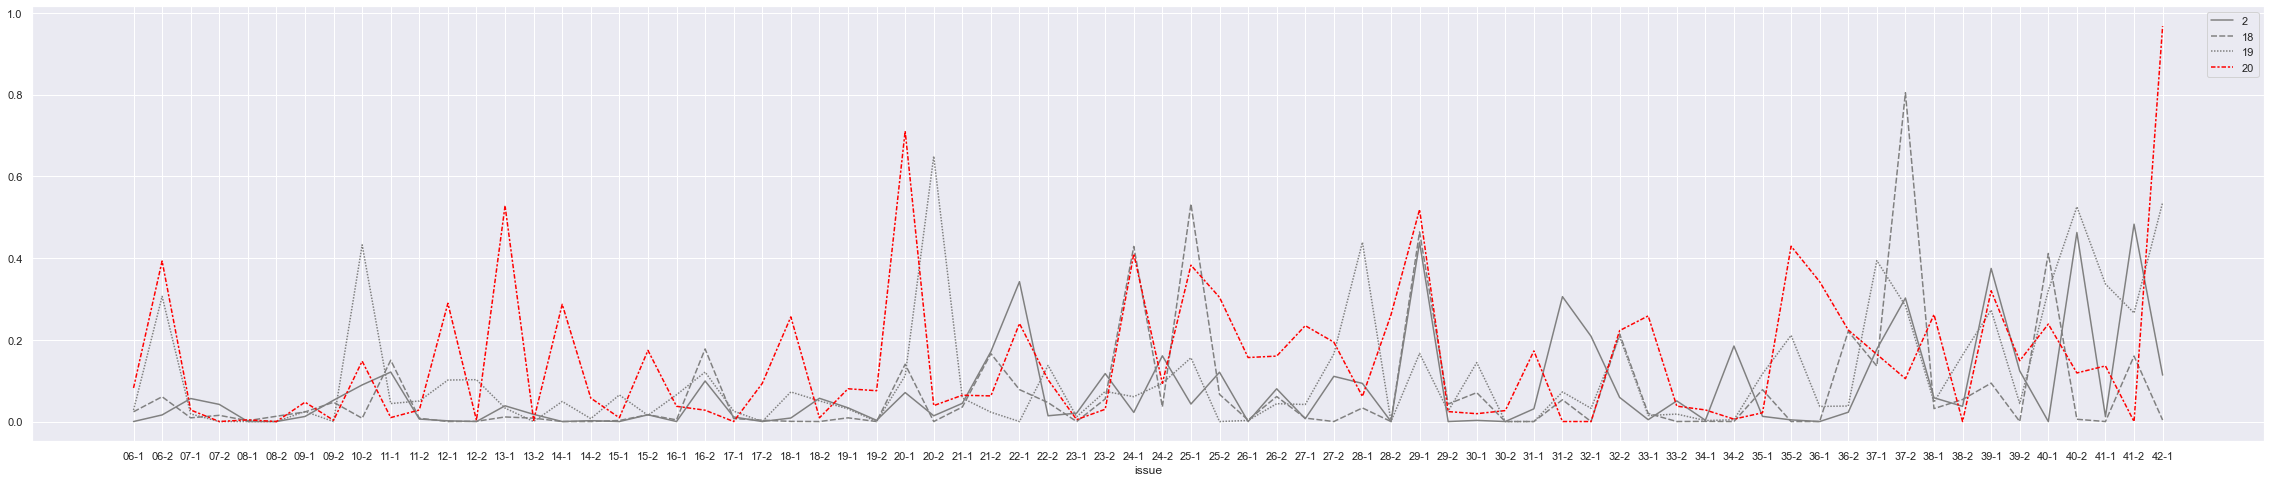

In [496]:
cols = [4,17]
plt.figure(figsize = [40, 8])
colors = ['grey', 'grey', 'grey','red']
plot = sns.lineplot(data=td_chart_issue2[[2,18,19,20]], palette=colors)

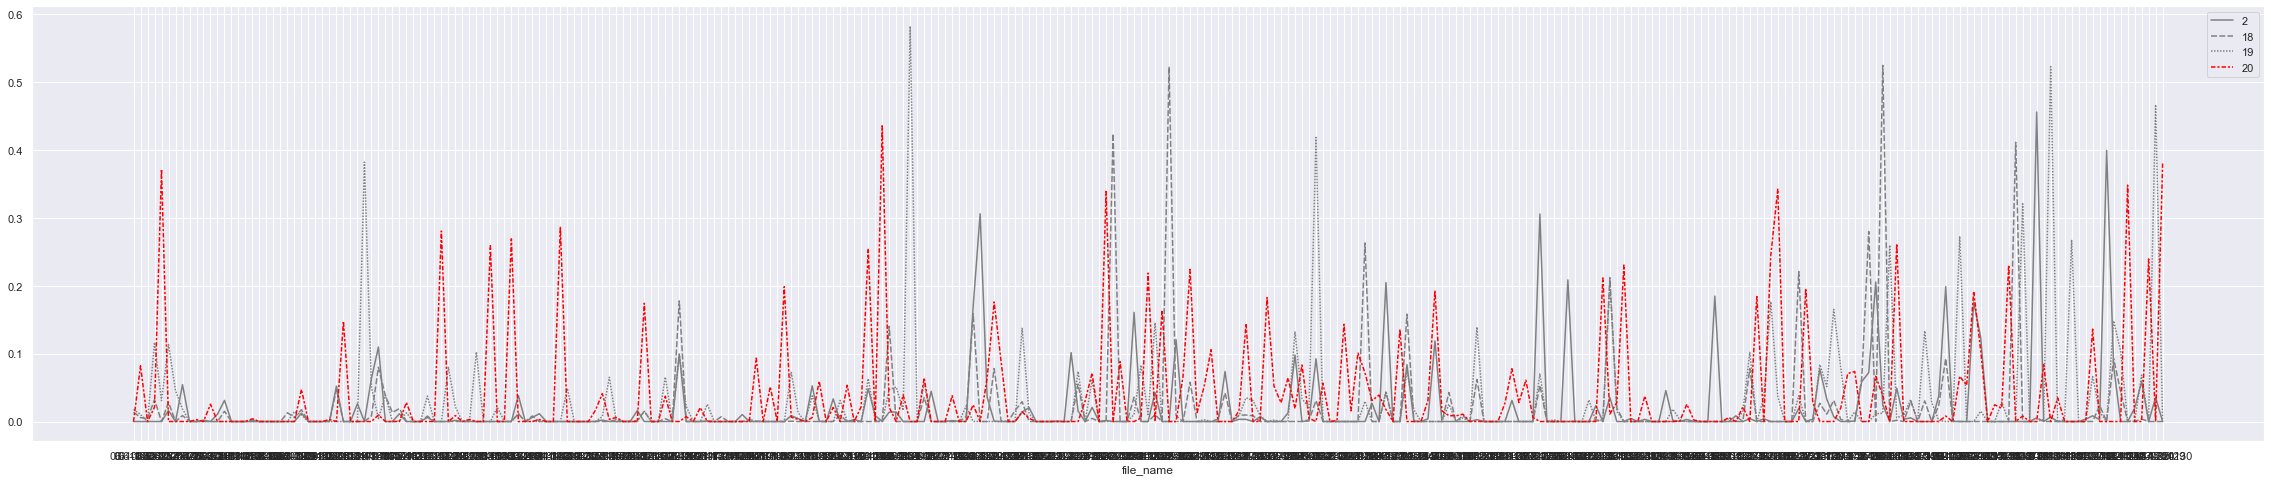

In [497]:
cols = [4,17]
plt.figure(figsize = [40, 8])
colors = ['grey', 'grey', 'grey','red']
plot = sns.lineplot(data=td_chart[[2,18,19,20]], palette=colors)

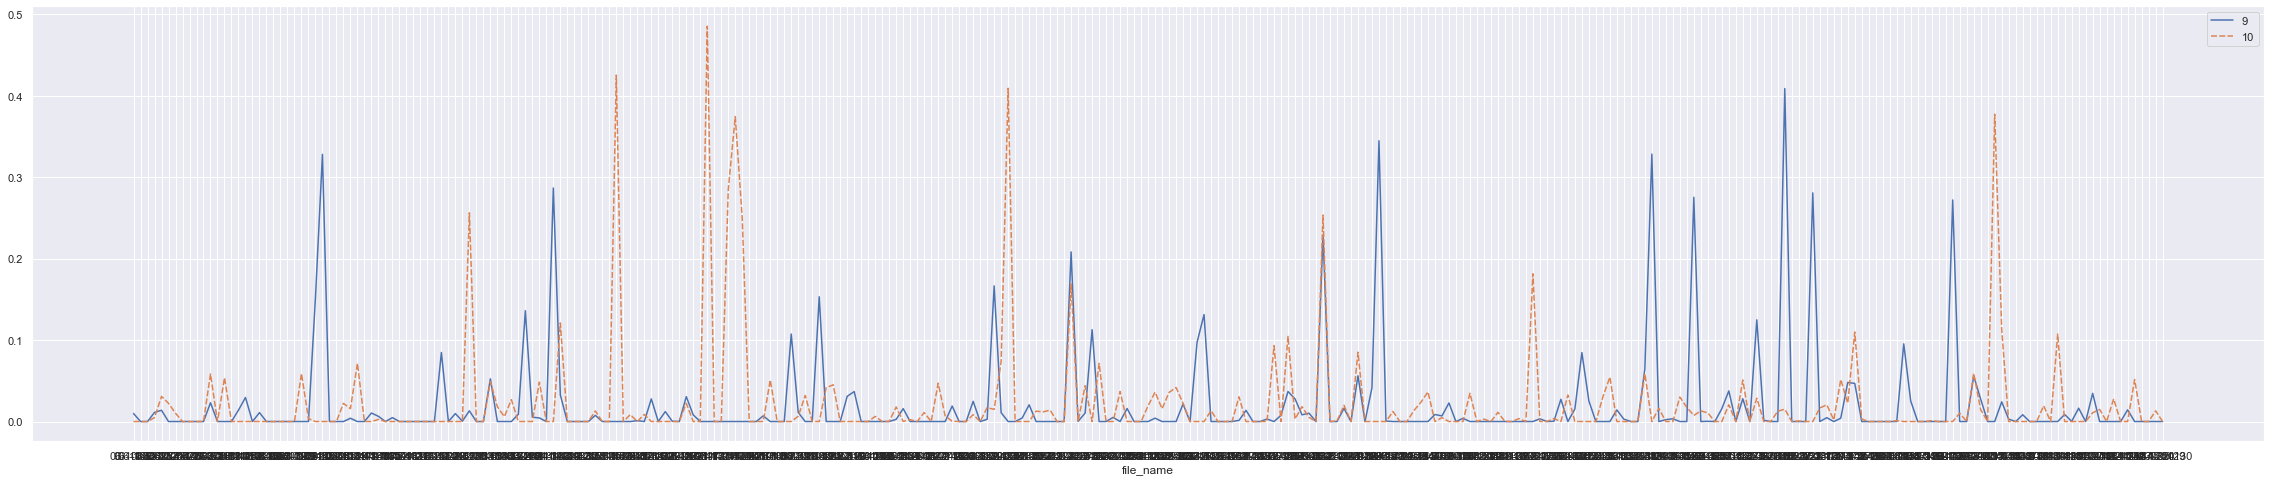

In [502]:
cols = [4,17]
plt.figure(figsize = [40, 8])
#colors = ['grey', 'grey', 'grey','red']
plot = sns.lineplot(data=td_chart[[10, 9]])

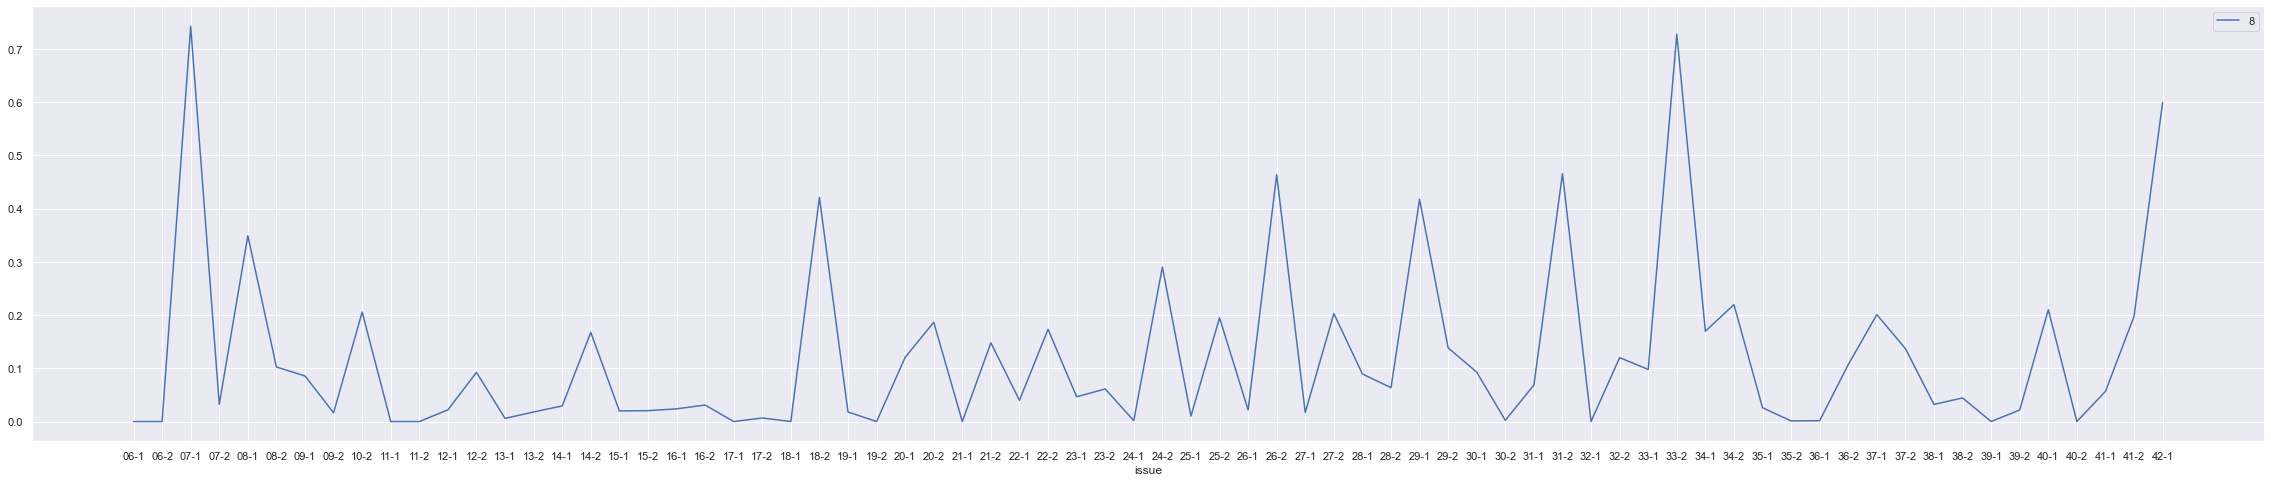

In [505]:
cols = [4,17]
plt.figure(figsize = [40, 8])
#colors = ['grey', 'grey', 'grey','red']
plot = sns.lineplot(data=td_chart_issue2[[8]])

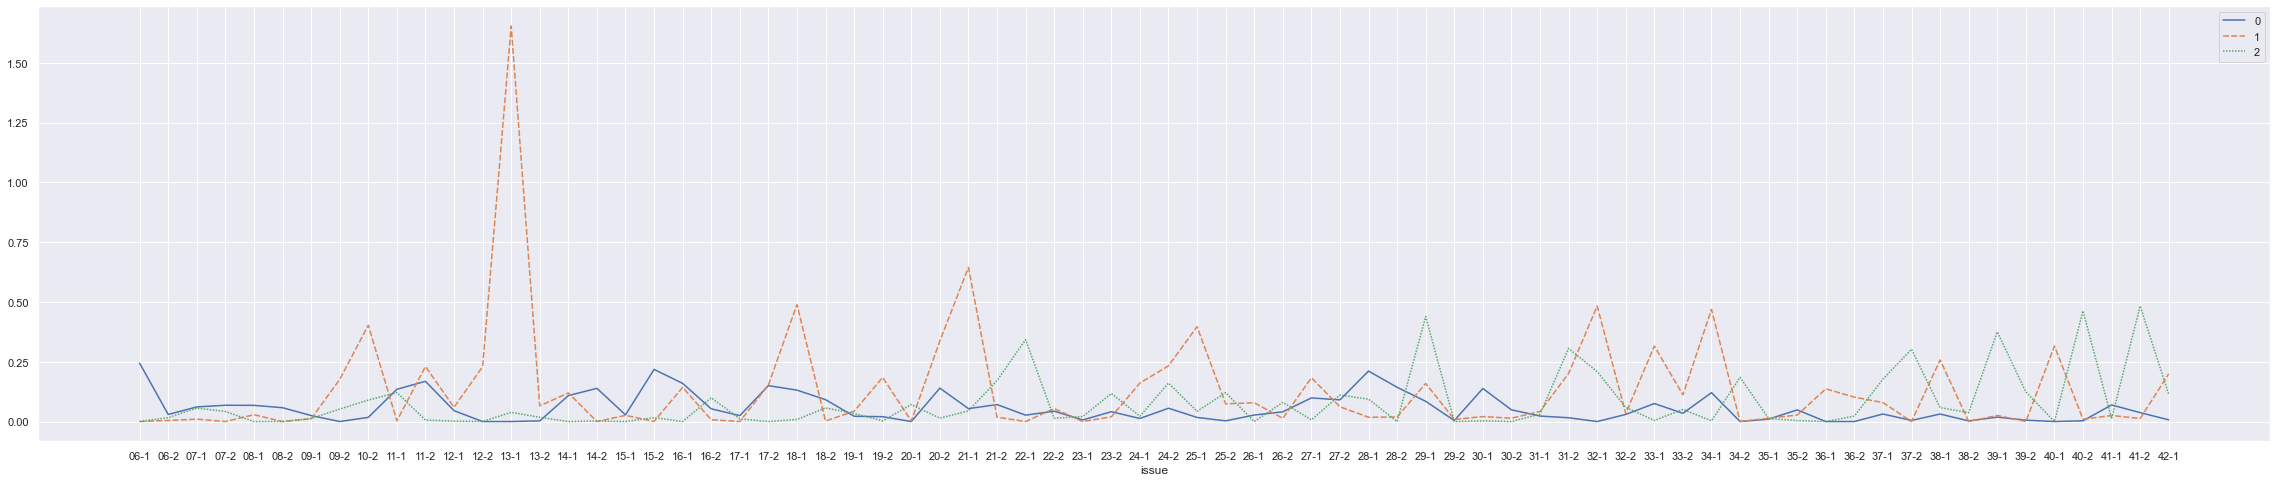

In [506]:
cols = [4,17]
plt.figure(figsize = [40, 8])
#colors = ['grey', 'grey', 'grey','red']
plot = sns.lineplot(data=td_chart_issue2[[0,1,2]])

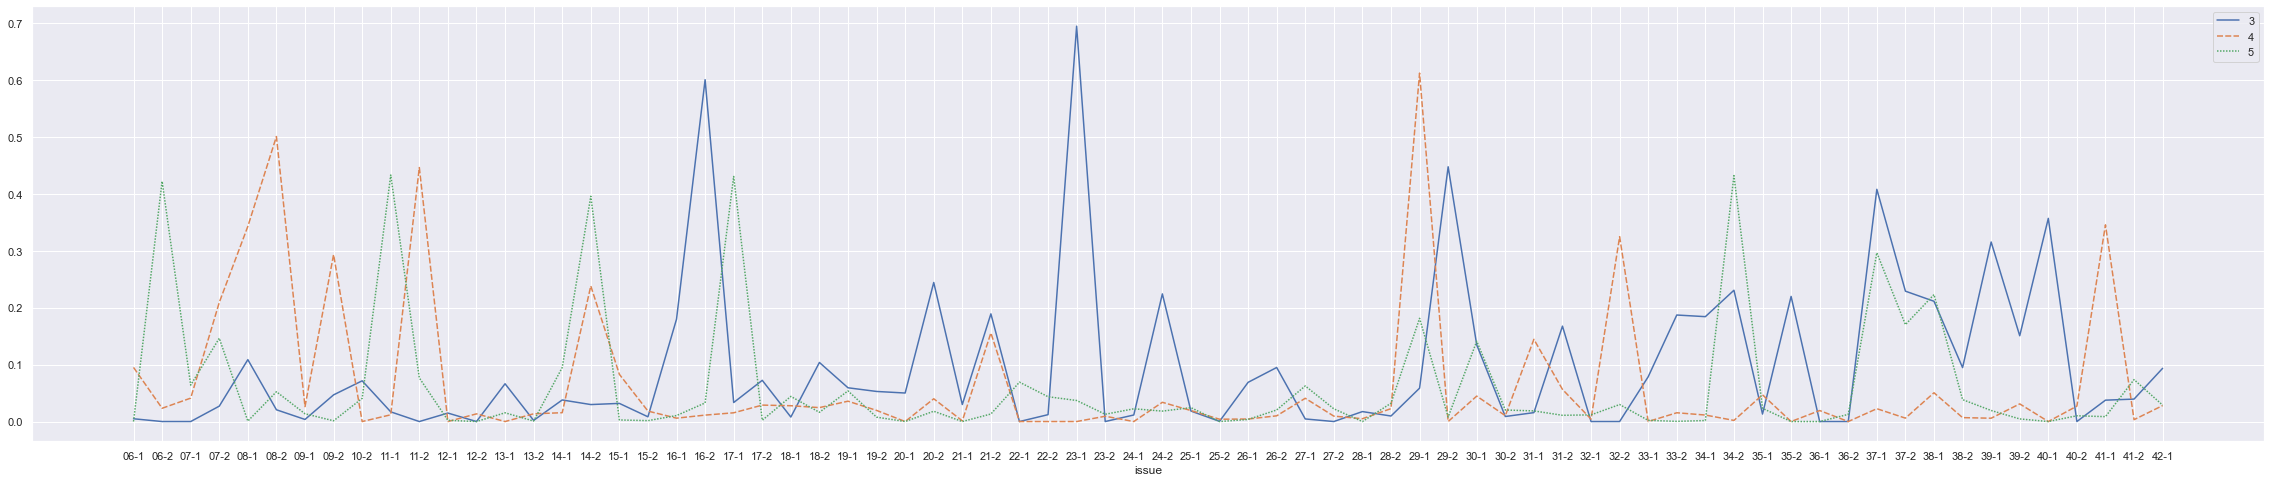

In [507]:
cols = [4,17]
plt.figure(figsize = [40, 8])
#colors = ['grey', 'grey', 'grey','red']
plot = sns.lineplot(data=td_chart_issue2[[3,4,5]])

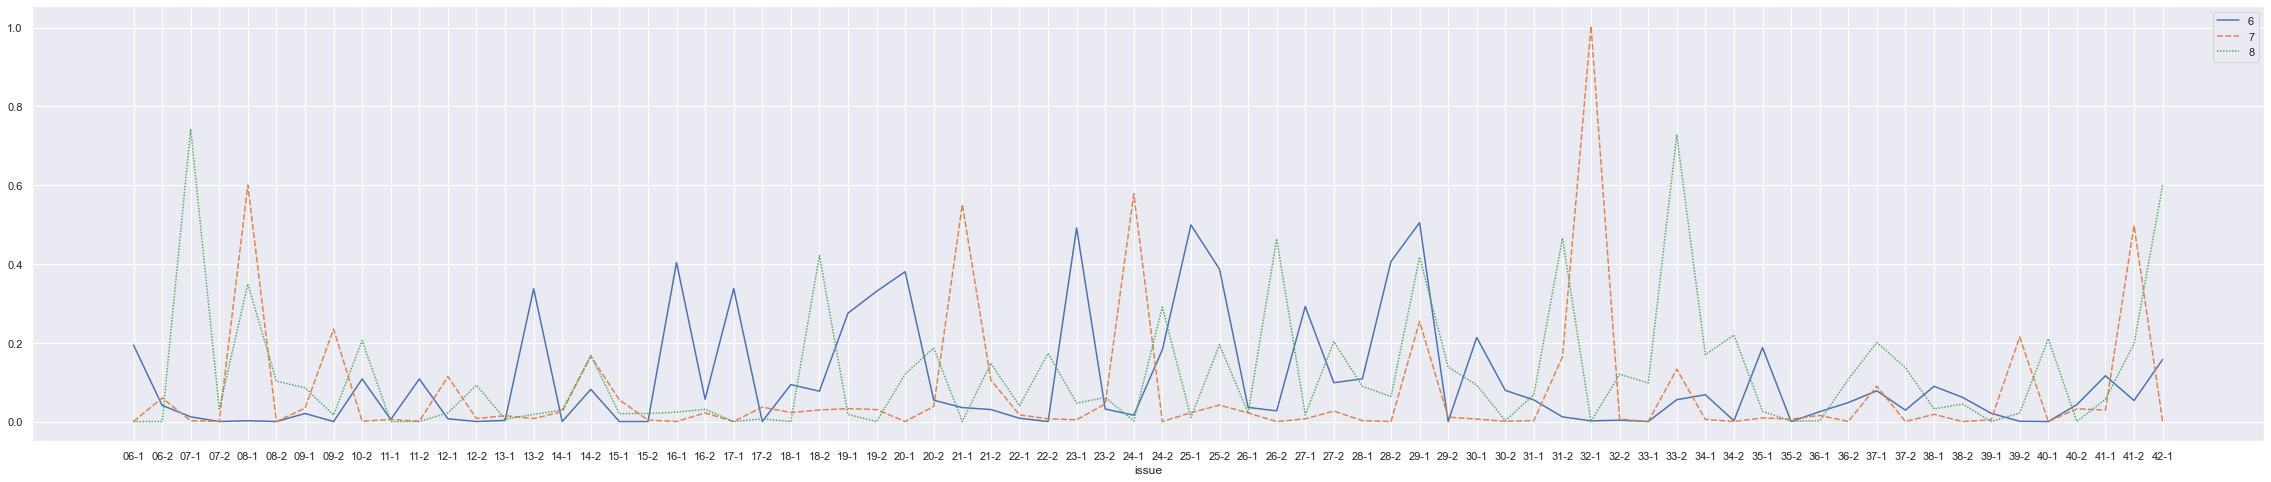

In [508]:
cols = [4,17]
plt.figure(figsize = [40, 8])
#colors = ['grey', 'grey', 'grey','red']
plot = sns.lineplot(data=td_chart_issue2[[6,7,8]])

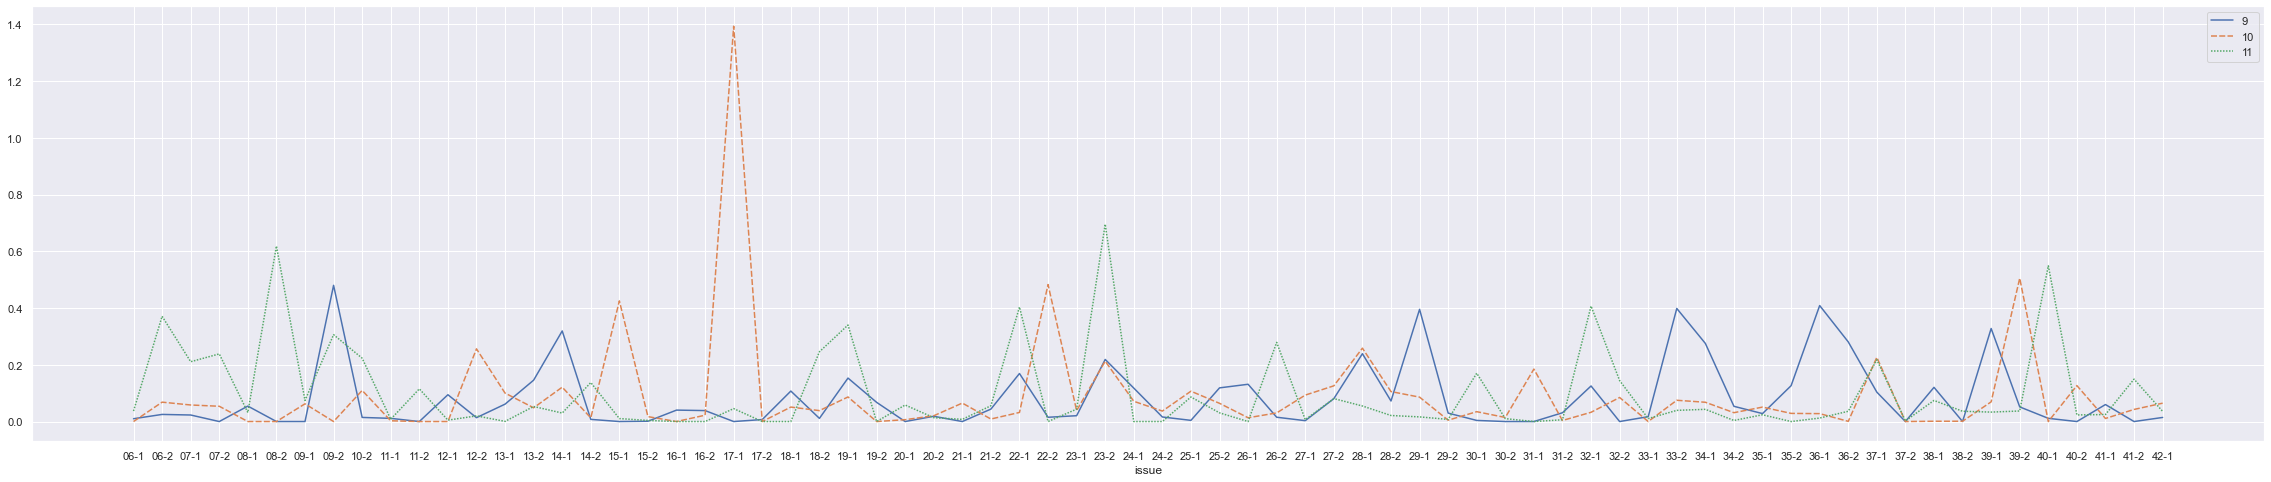

In [509]:
cols = [4,17]
plt.figure(figsize = [40, 8])
#colors = ['grey', 'grey', 'grey','red']
plot = sns.lineplot(data=td_chart_issue2[[9,10,11]])

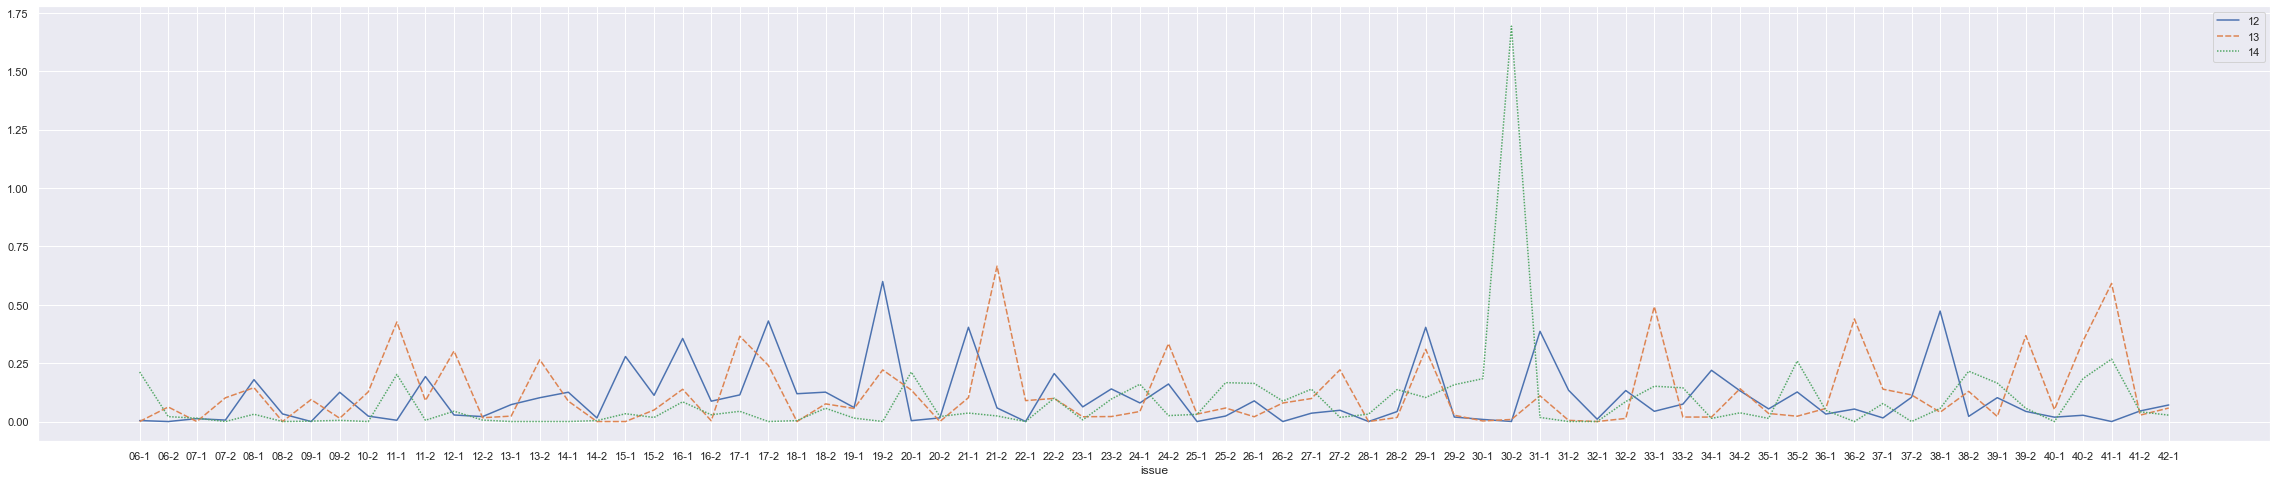

In [510]:
cols = [4,17]
plt.figure(figsize = [40, 8])
#colors = ['grey', 'grey', 'grey','red']
plot = sns.lineplot(data=td_chart_issue2[[12,13,14]])

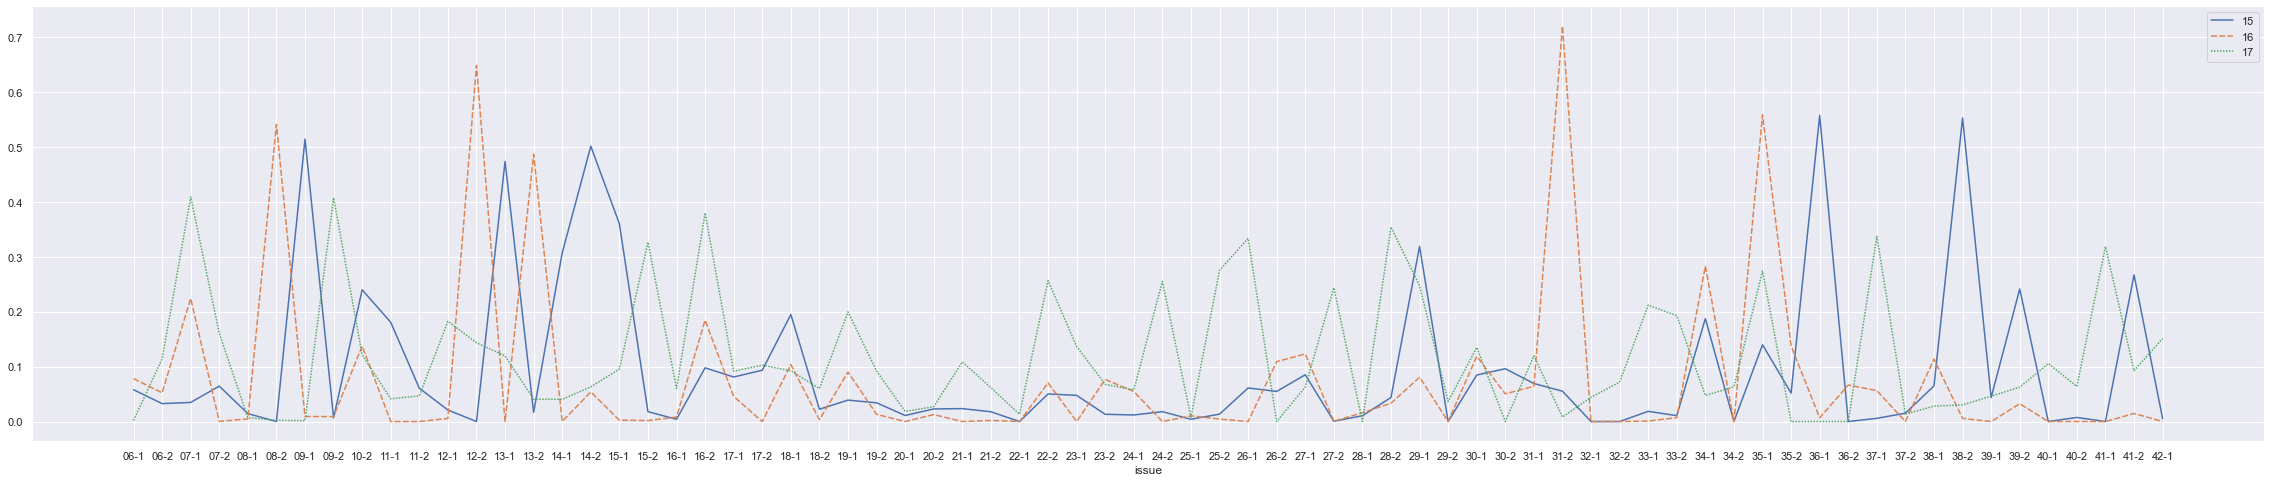

In [511]:
cols = [4,17]
plt.figure(figsize = [40, 8])
#colors = ['grey', 'grey', 'grey','red']
plot = sns.lineplot(data=td_chart_issue2[[15,16,17]])

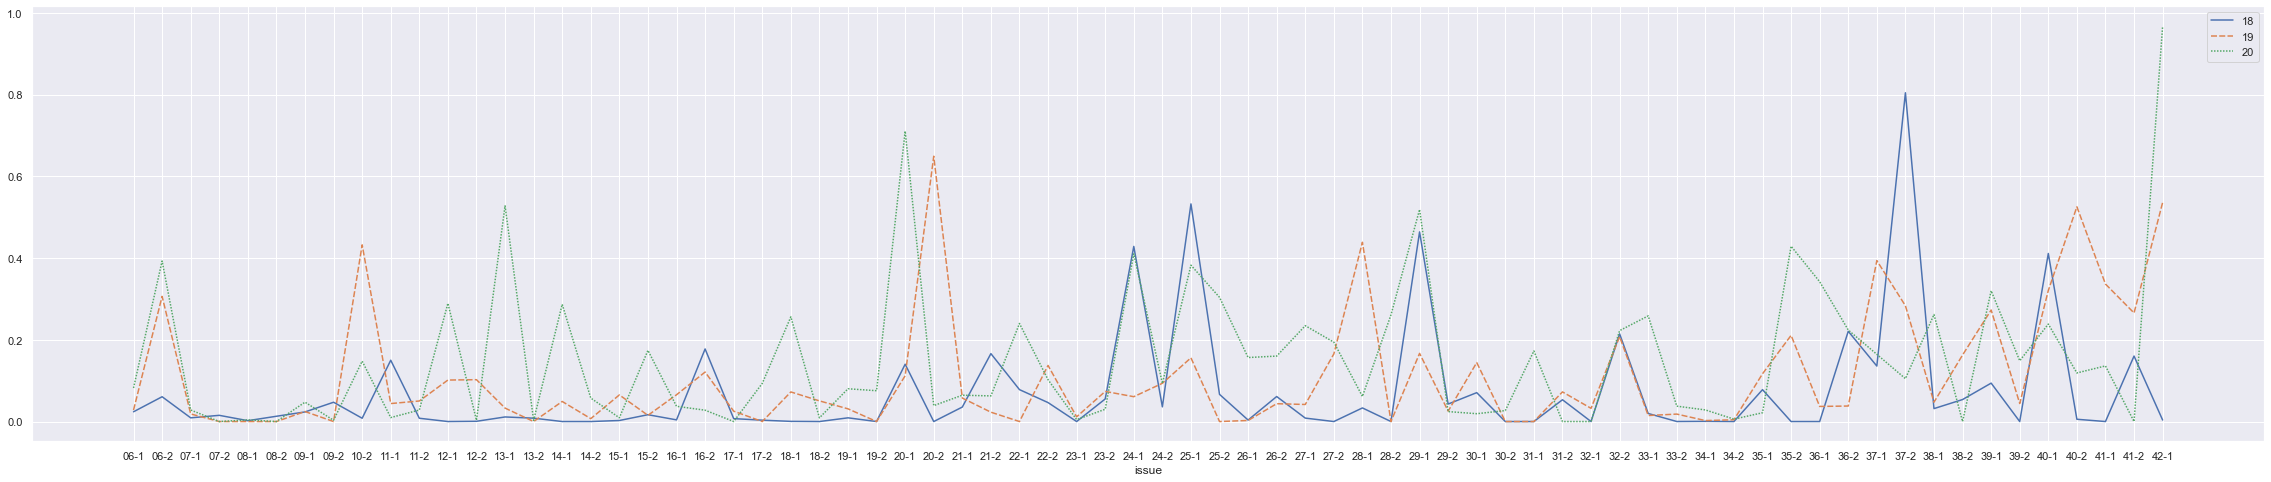

In [512]:
cols = [4,17]
plt.figure(figsize = [40, 8])
#colors = ['grey', 'grey', 'grey','red']
plot = sns.lineplot(data=td_chart_issue2[[18,19,20]])

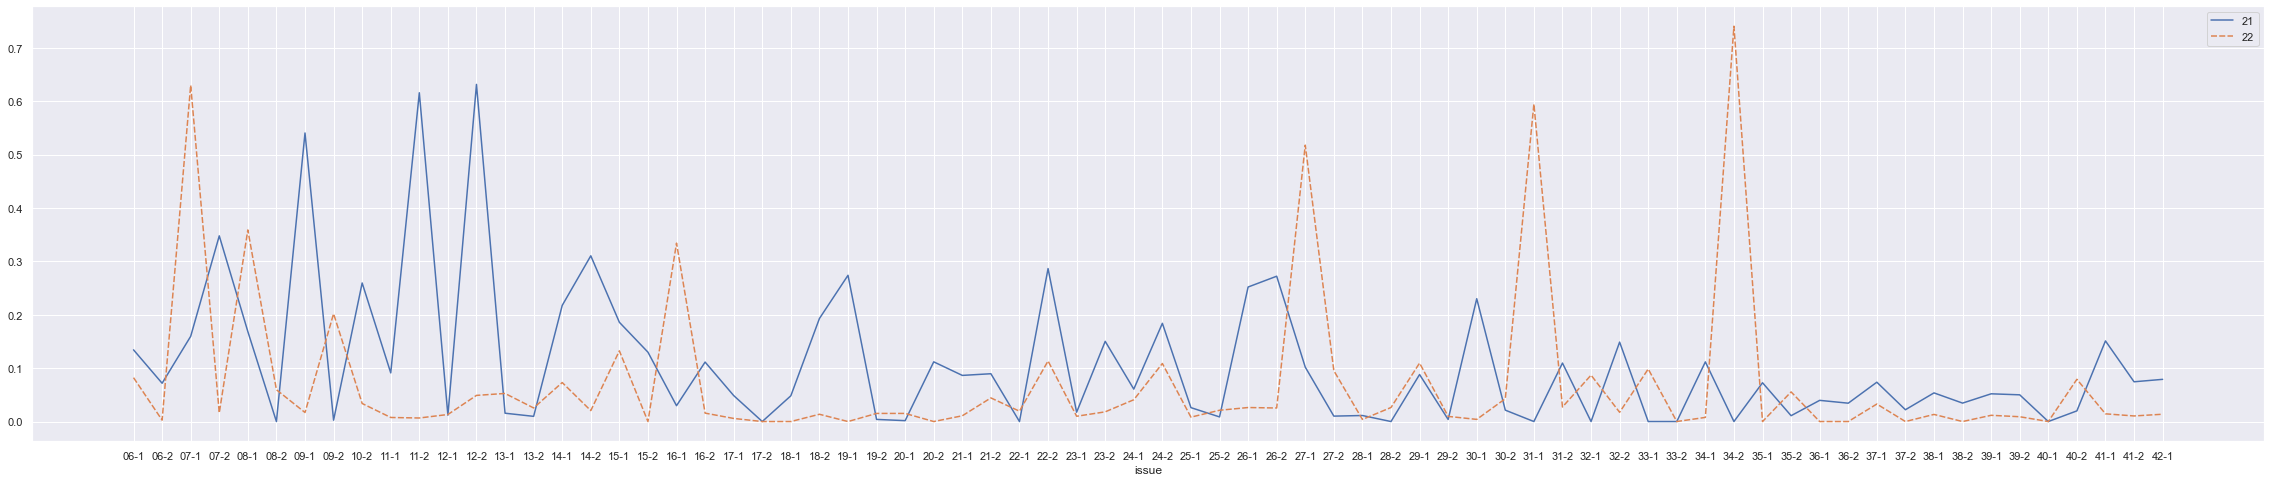

In [513]:
cols = [4,17]
plt.figure(figsize = [40, 8])
#colors = ['grey', 'grey', 'grey','red']
plot = sns.lineplot(data=td_chart_issue2[[21,22]])

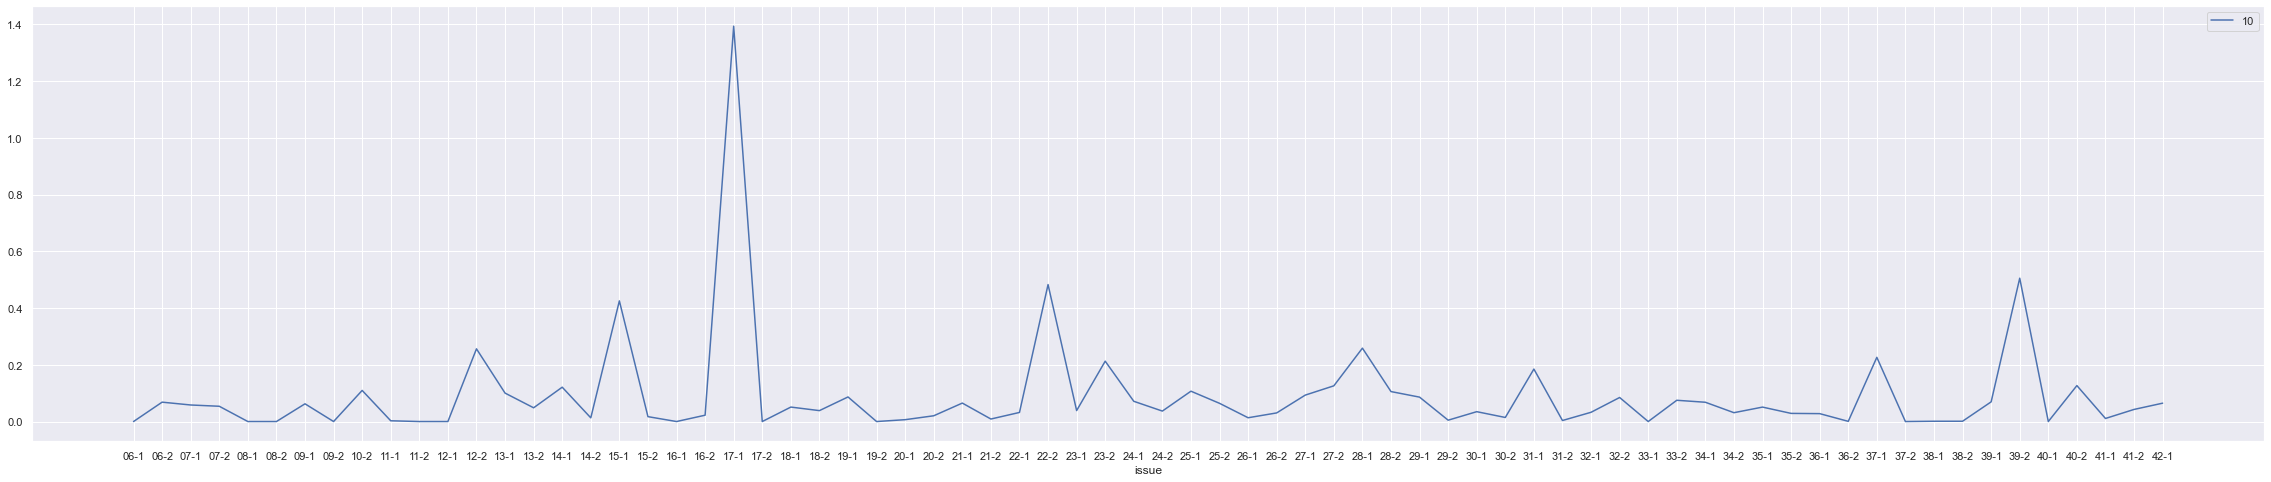

In [519]:
cols = [4,17]
plt.figure(figsize = [40, 8])
#colors = ['grey', 'grey', 'grey','red']
plot = sns.lineplot(data=td_chart_issue2[[10]])

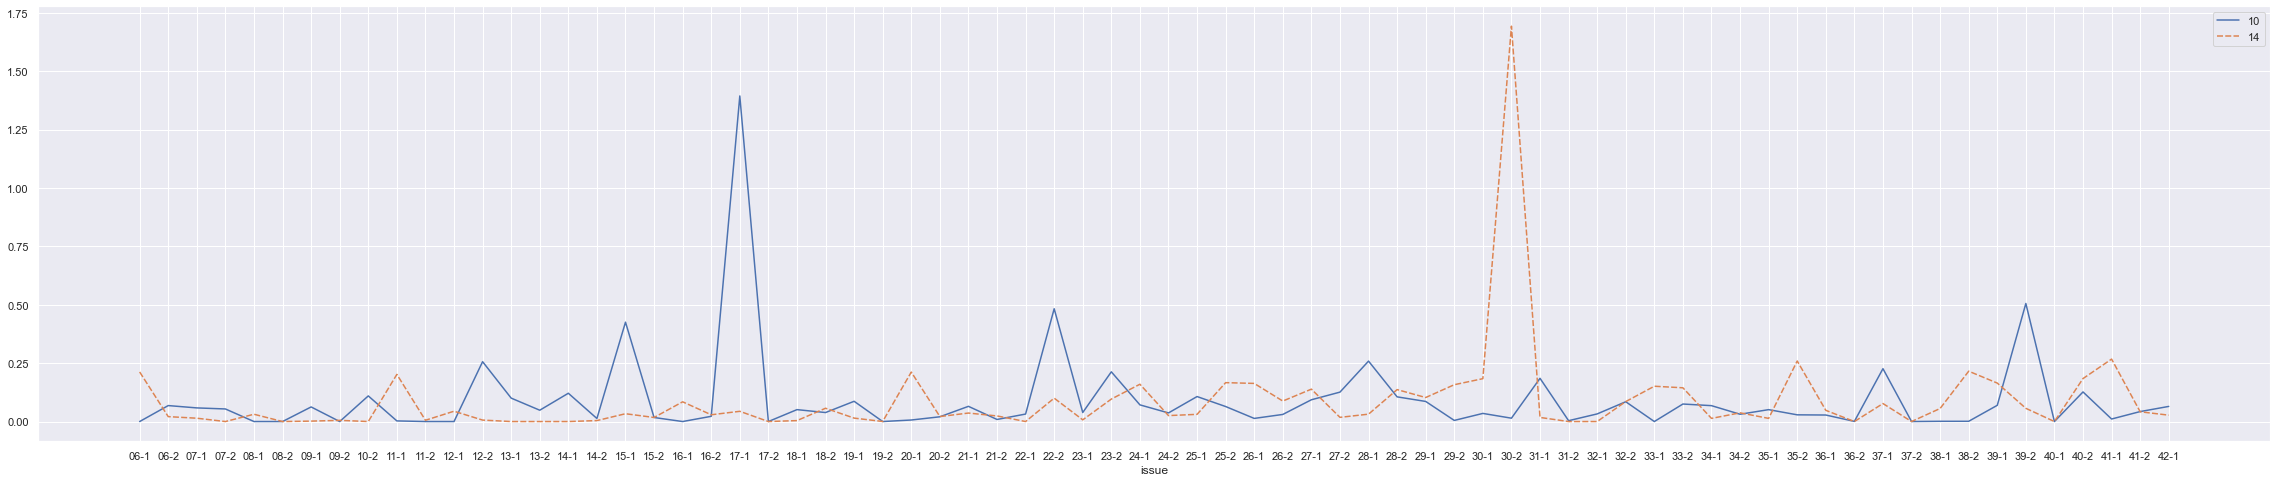

In [523]:
cols = [4,17]
plt.figure(figsize = [40, 8])
#colors = ['grey', 'grey', 'grey','red']
plot = sns.lineplot(data=td_chart_issue2[[10, 14]])

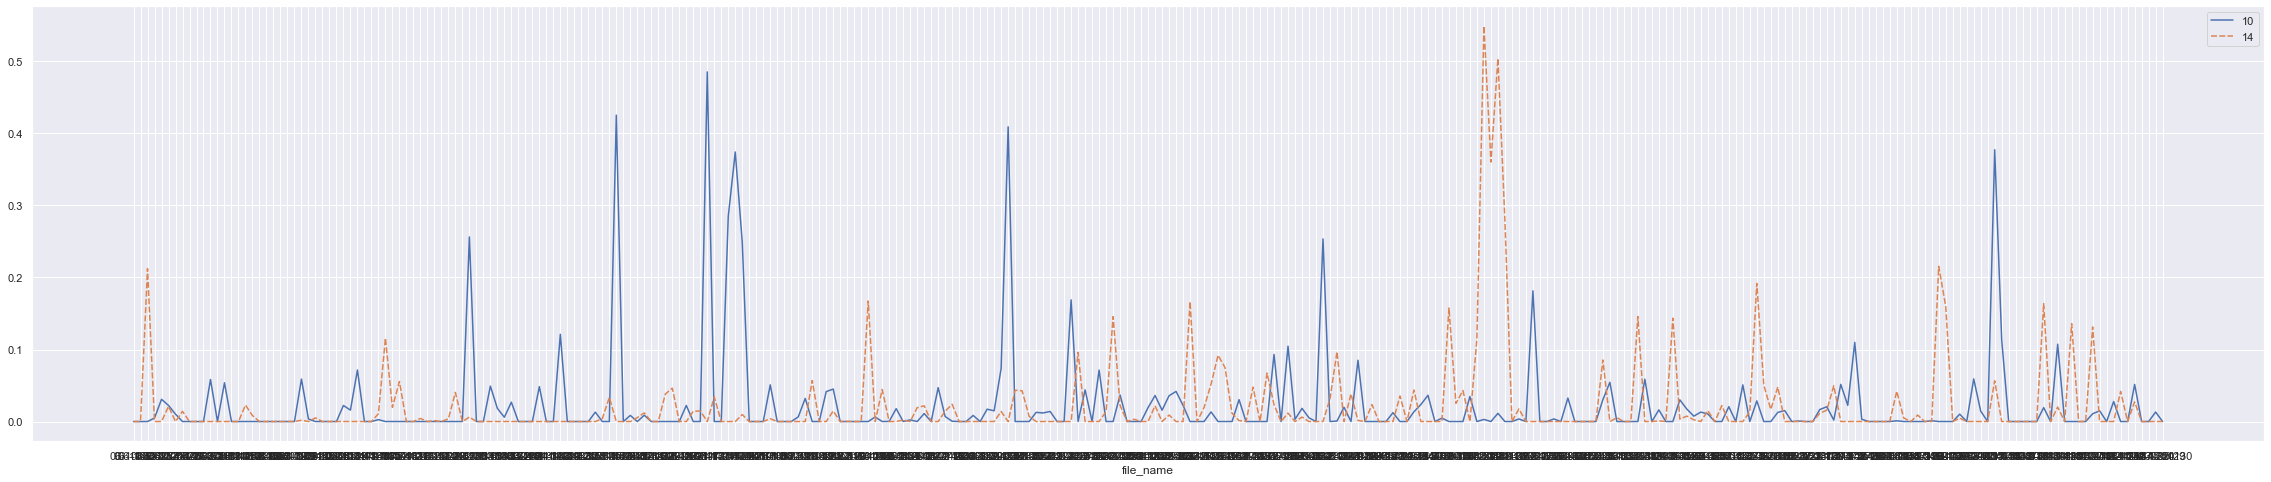

In [522]:
cols = [4,17]
plt.figure(figsize = [40, 8])
#colors = ['grey', 'grey', 'grey','red']
plot = sns.lineplot(data=td_chart[[14, 10]])

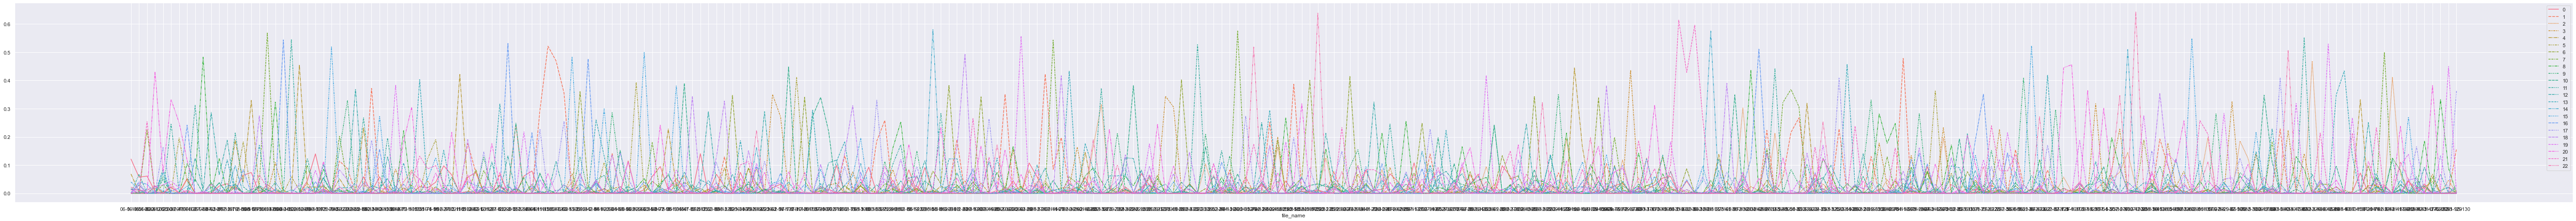

In [473]:
cols = [4,17]
plt.figure(figsize = [100, 8])
plot = sns.lineplot(data=td_chart)